In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/logically_mapped_pathway_dataset_10000.csv")

# Split input and output
X_raw = df.drop(columns=["Recommended Pathways"])
y_raw = df["Recommended Pathways"]

# Create directory for saving label encoders
os.makedirs("label_encoders_rf", exist_ok=True)

# Label encode inputs and save encoders
label_encoders = {}
X_encoded = pd.DataFrame()

for col in X_raw.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_raw[col])
    label_encoders[col] = le
    joblib.dump(le, f"label_encoders_rf/{col}_encoder.pkl")

# MultiLabel Binarize output
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_raw.str.split("; "))
joblib.dump(mlb, "label_encoders_rf/target_mlb.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train model
rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))




                                       precision    recall  f1-score   support

          Adaptive Self-Care Training       1.00      0.98      0.99       686
Attention & Behavioral Focus Training       1.00      0.96      0.98       560
           Auditory Learning Sessions       1.00      0.96      0.98       499
        Developmental Support Program       1.00      0.97      0.99       627
         Expressive Practice Sessions       1.00      0.99      1.00      1360
              Generalization Practice       1.00      0.99      0.99      1130
              Guided Learning Support       1.00      0.98      0.99      1009
       Intensive Intervention Program       1.00      0.98      0.99       703
    Social Communication Intervention       1.00      0.99      0.99       645
                       Speech Therapy       1.00      0.99      1.00      1180

                            micro avg       1.00      0.98      0.99      8399
                            macro avg       1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
// ...existing code...
import Dashboard from './components/Dashboard';
import AssessmentForm from './components/AssessmentForm';
import Results from './components/Results';
import Profile from './components/Profile';

function App() {
  return (
    <div className="flex flex-col min-h-screen bg-gray-100 dark:bg-gray-900 transition-colors">
      <Navbar />
      <Routes>
        <Route path="/" element={<Home />} />
        <Route path="/signup" element={<SignupPage />} />
        <Route path="/login" element={<LoginPage />} />
        <Route path="/forgot-password" element={<ForgotPasswordPage />} />
        <Route path="/dashboard" element={<Dashboard />} />
        <Route path="/assessment" element={<AssessmentForm />} />
        <Route path="/results" element={<Results />} />
        <Route path="/profile" element={<Profile />} />
      </Routes>
      <Footer />
    </div>
  );
}
// ...existing code...// ...existing code...
import Dashboard from './components/Dashboard';
import AssessmentForm from './components/AssessmentForm';
import Results from './components/Results';
import Profile from './components/Profile';

function App() {
  return (
    <div className="flex flex-col min-h-screen bg-gray-100 dark:bg-gray-900 transition-colors">
      <Navbar />
      <Routes>
        <Route path="/" element={<Home />} />
        <Route path="/signup" element={<SignupPage />} />
        <Route path="/login" element={<LoginPage />} />
        <Route path="/forgot-password" element={<ForgotPasswordPage />} />
        <Route path="/dashboard" element={<Dashboard />} />
        <Route path="/assessment" element={<AssessmentForm />} />
        <Route path="/results" element={<Results />} />
        <Route path="/profile" element={<Profile />} />
      </Routes>
      <Footer />
    </div>
  );
}
// ...existing code...// Example login API call
const response = await fetch('/api/auth/login', {
  method: 'POST',
  headers: { 'Content-Type': 'application/json' },
  body: JSON.stringify({ email, password }),
});
const data = await response.json();
localStorage.setItem('token', data.token);@PostMapping("/api/recommend")
public ResponseEntity<?> recommend(@RequestBody AssessmentData data, @RequestHeader("Authorization") String token) {
    // Validate JWT, then:
    // Call Python AI service (e.g., via RestTemplate)
    // Return recommendations
}from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)
model = pickle.load(open('random_forest_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # preprocess data
    prediction = model.predict([data['features']])
    return jsonify({'pathway': prediction.tolist()})

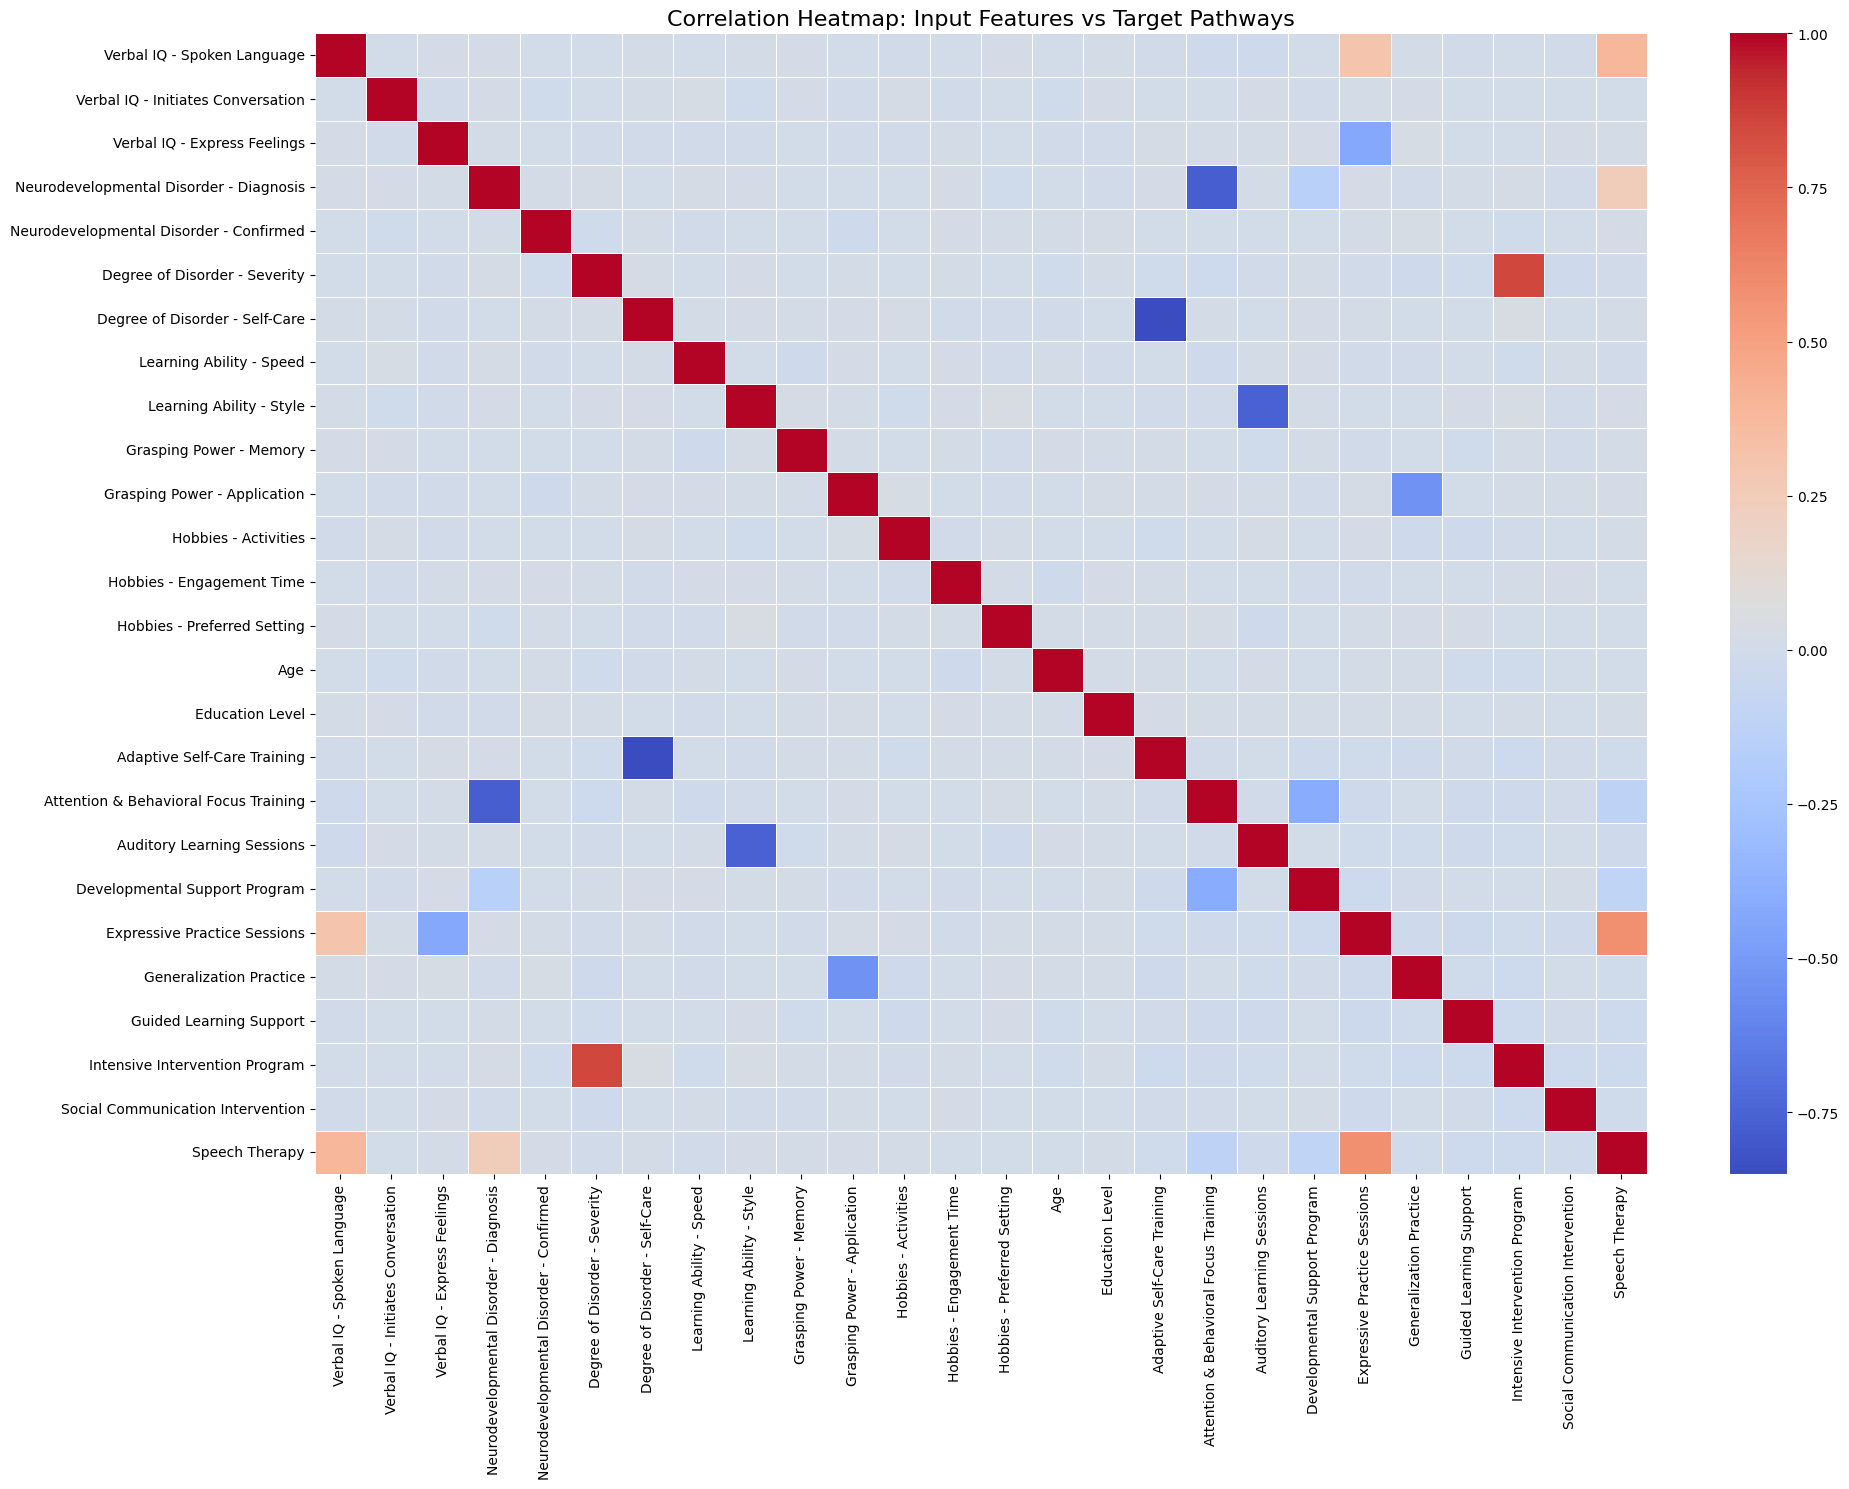

In [2]:
# ==== HEATMAP ====
# Combine input and target data into one DataFrame
df_corr = X_encoded.copy()
for i, name in enumerate(mlb.classes_):
    df_corr[name] = y_encoded[:, i]

# Correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap: Input Features vs Target Pathways", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
X_raw

,Verbal IQ - Spoken Language,Verbal IQ - Initiates Conversation,Verbal IQ - Express Feelings,Neurodevelopmental Disorder - Diagnosis,Neurodevelopmental Disorder - Confirmed,Degree of Disorder - Severity,Degree of Disorder - Self-Care,Learning Ability - Speed,Learning Ability - Style,Grasping Power - Memory,Grasping Power - Application,Hobbies - Activities,Hobbies - Engagement Time,Hobbies - Preferred Setting,Age,Education Level
0,Communicates clearly for their age,Frequently,No,ADHD,Yes,Mild - minimal support required,Yes,With some support,"Visual (images, videos)",Applies without difficulty,No,Watching videos or cartoons,Less than 10 minutes,Alone,5-7 years,Preschool / Kindergarten
1,Communicates clearly for their age,Frequently,Sometimes,Specific Learning Disorder (SLD),No,Moderate - regular assistance required,Partially,With repeated practice,"Visual (images, videos)",Often forgets and needs to relearn,Sometimes,Watching videos or cartoons,10-30 minutes,In a group setting,11-13 years,Preschool / Kindergarten
2,Uses simple words and phrases,Occasionally,No,No formal diagnosis / Not sure,Yes,Severe - continuous supervision needed,Yes,With some support,"Auditory (spoken instructions, music)",Often forgets and needs to relearn,Often,Watching videos or cartoons,More than 30 minutes,Alone,11-13 years,Preschool / Kindergarten
3,Uses advanced vocabulary,Frequently,Yes,ADHD,Yes,Moderate - regular assistance required,No,With significant difficulty,Not sure yet,Retains with reminders or review,No,Playing games or puzzles,More than 30 minutes,With a parent/guardian,5-7 years,Preschool / Kindergarten
4,Uses simple words and phrases,Frequently,Sometimes,ADHD,Under Evaluation,Moderate - regular assistance required,Partially,Quickly and independently,Not sure yet,Often forgets and needs to relearn,No,Storytelling or reading books,Less than 10 minutes,Alone,14 years or older,High School (9th+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Uses simple words and phrases,Never,Sometimes,ADHD,No,Moderate - regular assistance required,Yes,With repeated practice,"Visual (images, videos)",Applies without difficulty,Sometimes,Storytelling or reading books,Less than 10 minutes,In a group setting,8-10 years,Primary School (1st-5th)
9996,Uses simple words and phrases,Never,Sometimes,Autism Spectrum Disorder (ASD),Under Evaluation,Mild - minimal support required,Partially,Quickly and independently,"Visual (images, videos)",Retains with reminders or review,Sometimes,Playing games or puzzles,More than 30 minutes,With a parent/guardian,14 years or older,High School (9th+)
9997,Communicates clearly for their age,Never,Sometimes,Specific Learning Disorder (SLD),No,Moderate - regular assistance required,Partially,With significant difficulty,"Auditory (spoken instructions, music)",Retains with reminders or review,Sometimes,Storytelling or reading books,Less than 10 minutes,Alone,14 years or older,High School (9th+)
9998,Rarely speaks or responds,Frequently,No,ADHD,Yes,Mild - minimal support required,Partially,With some support,"Visual (images, videos)",Applies without difficulty,No,Drawing or coloring,Less than 10 minutes,With a parent/guardian,8-10 years,Primary School (1st-5th)


In [3]:
X_encoded

,Verbal IQ - Spoken Language,Verbal IQ - Initiates Conversation,Verbal IQ - Express Feelings,Neurodevelopmental Disorder - Diagnosis,Neurodevelopmental Disorder - Confirmed,Degree of Disorder - Severity,Degree of Disorder - Self-Care,Learning Ability - Speed,Learning Ability - Style,Grasping Power - Memory,Grasping Power - Application,Hobbies - Activities,Hobbies - Engagement Time,Hobbies - Preferred Setting,Age,Education Level
0,0,0,0,0,2,0,2,3,3,0,0,5,1,0,3,3
1,0,0,1,5,0,1,1,1,3,1,2,5,0,1,0,3
2,3,2,0,4,2,2,2,3,0,1,1,5,2,0,0,3
3,2,0,2,0,2,1,0,2,2,2,0,3,2,2,3,3
4,3,0,1,0,1,1,1,0,2,1,0,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,0,0,1,2,1,3,0,2,4,1,1,4,4
9996,3,1,1,1,1,0,1,0,3,2,2,3,2,2,1,0
9997,0,1,1,5,0,1,1,2,0,2,2,4,1,0,1,0
9998,1,0,0,0,2,0,1,3,3,0,0,0,1,2,4,4


In [5]:
y_raw

,Recommended Pathways
0,Attention & Behavioral Focus Training; Express...
1,Generalization Practice; Guided Learning Support
2,Auditory Learning Sessions; Expressive Practic...
3,Adaptive Self-Care Training; Attention & Behav...
4,Attention & Behavioral Focus Training; Express...
...,...
9995,Attention & Behavioral Focus Training; Express...
9996,Attention & Behavioral Focus Training; Express...
9997,Auditory Learning Sessions; Guided Learning Su...
9998,Attention & Behavioral Focus Training; Express...


In [6]:
y_encoded

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [9]:
# Save the trained model
joblib.dump(rf, "rf_multilabel_model.pkl")


['rf_multilabel_model.pkl']

In [11]:
import joblib
import pandas as pd

# Define the 16 questions and options
questions = {
    "Verbal IQ - Spoken Language": [
        "Rarely speaks or responds",
        "Uses simple words and phrases",
        "Communicates clearly for their age",
        "Uses advanced vocabulary"
    ],
    "Verbal IQ - Initiates Conversation": [
        "Never", "Occasionally", "Frequently"
    ],
    "Verbal IQ - Express Feelings": [
        "No", "Sometimes", "Yes"
    ],
    "Neurodevelopmental Disorder - Diagnosis": [
        "Autism Spectrum Disorder (ASD)",
        "ADHD",
        "Intellectual Disability (ID)",
        "Specific Learning Disorder (SLD)",
        "Speech or Language Disorder",
        "Global Developmental Delay",
        "No formal diagnosis / Not sure"
    ],
    "Neurodevelopmental Disorder - Confirmed": [
        "Yes", "No", "Under Evaluation"
    ],
    "Degree of Disorder - Severity": [
        "Mild – minimal support required",
        "Moderate – regular assistance required",
        "Severe – continuous supervision needed"
    ],
    "Degree of Disorder - Self-Care": [
        "Yes", "Partially", "No"
    ],
    "Learning Ability - Speed": [
        "With significant difficulty",
        "With repeated practice",
        "With some support",
        "Quickly and independently"
    ],
    "Learning Ability - Style": [
        "Visual (images, videos)",
        "Auditory (spoken instructions, music)",
        "Kinesthetic (hands-on activities)",
        "Not sure yet"
    ],
    "Grasping Power - Memory": [
        "Often forgets and needs to relearn",
        "Retains with reminders or review",
        "Applies without difficulty"
    ],
    "Grasping Power - Application": [
        "No", "Sometimes", "Often"
    ],
    "Hobbies - Activities": [
        "Drawing or coloring",
        "Listening to music or singing",
        "Playing games or puzzles",
        "Watching videos or cartoons",
        "Outdoor play / physical games",
        "Storytelling or reading books"
    ],
    "Hobbies - Engagement Time": [
        "Less than 10 minutes",
        "10–30 minutes",
        "More than 30 minutes"
    ],
    "Hobbies - Preferred Setting": [
        "Alone", "With a parent/guardian", "In a group setting"
    ],
    "Age": [
        "2–4 years", "5–7 years", "8–10 years", "11–13 years", "14 years or older"
    ],
    "Education Level": [
        "Not in school yet",
        "Preschool / Kindergarten",
        "Primary School (1st–5th)",
        "Middle School (6th–8th)",
        "High School (9th+)"
    ]
}

# Gather inputs from user
# Safely get choices from LabelEncoders instead of hardcoding options
user_input = {}
print("📋 Please answer the following questions by selecting a number for each option:\n")

for col in questions:
    le_path = f"label_encoders_rf/{col}_encoder.pkl"
    le = joblib.load(le_path)
    options = list(le.classes_)  # use the exact classes seen during training

    print(f"\n👉 {col}")
    for i, option in enumerate(options, 1):
        print(f"  {i}. {option}")

    while True:
        try:
            choice = int(input("Enter choice number: "))
            if 1 <= choice <= len(options):
                user_input[col] = options[choice - 1]
                break
            else:
                print(f"Please enter a number between 1 and {len(options)}.")
        except ValueError:
            print("Invalid input. Please enter a number.")


# Encode input using saved LabelEncoders
encoded_input = []
for col, val in user_input.items():
    le = joblib.load(f"label_encoders_rf/{col}_encoder.pkl")
    encoded_val = le.transform([val])[0]
    encoded_input.append(encoded_val)

# Convert to DataFrame
X_input_df = pd.DataFrame([encoded_input], columns=questions.keys())

# Load model and MultiLabelBinarizer
rf_model = joblib.load("rf_multilabel_model.pkl")
mlb = joblib.load("label_encoders_rf/target_mlb.pkl")

# Predict
y_pred = rf_model.predict(X_input_df)
predicted_pathways = mlb.inverse_transform(y_pred)[0]

# Display results
print("\n🔮 Predicted Recommended Pathways:")
for p in predicted_pathways:
    print("-", p)


📋 Please answer the following questions by selecting a number for each option:


👉 Verbal IQ - Spoken Language
  1. Communicates clearly for their age
  2. Rarely speaks or responds
  3. Uses advanced vocabulary
  4. Uses simple words and phrases
Enter choice number: 1

👉 Verbal IQ - Initiates Conversation
  1. Frequently
  2. Never
  3. Occasionally
Enter choice number: 3

👉 Verbal IQ - Express Feelings
  1. No
  2. Sometimes
  3. Yes
Enter choice number: 3

👉 Neurodevelopmental Disorder - Diagnosis
  1. ADHD
  2. Autism Spectrum Disorder (ASD)
  3. Global Developmental Delay
  4. Intellectual Disability (ID)
  5. No formal diagnosis / Not sure
  6. Specific Learning Disorder (SLD)
  7. Speech or Language Disorder
Enter choice number: 5

👉 Neurodevelopmental Disorder - Confirmed
  1. No
  2. Under Evaluation
  3. Yes
Enter choice number: 2

👉 Degree of Disorder - Severity
  1. Mild - minimal support required
  2. Moderate - regular assistance required
  3. Severe - continuous supervis